In [211]:
#Importación de librerias a utilizar en este proyecto.
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


___
#  1 Abstract

La **diabetes** es una enfermedad metabólica crónica caracterizada por niveles elevados de glucosa en sangre (azúcar sanguínea) que puede producir daños a nivel del corazón, vasos sanguíneos, ojos, riñones y nervios. Durante las últimas décadas, tanto el número de casos como la prevalencia de diabetes han aumentado de forma contínua afectando en la actualidad a cerca de **422 millones de personas** [[1]](https://www.who.int/health-topics/diabetes#tab=tab_1).

La diabetes ha sido ampliamente relacionada a **menores condiciones socioeconómicas** como consecuencia al acceso reducido a una buena alimentación, actividad física y atención a la salud. Respecto a esto, la Organización Mundial de la Salud (OMS) ha declarado que mayoría de las personas que padecen diabetes viven en países con ingresos bajos y medios [[1]](https://www.who.int/health-topics/diabetes#tab=tab_1).

Este trabajo forma parte de un proyecto de mayor amplitud que busca generar un **modelo predictor de diabetes** mediante características básicas de la persona en cuestión, con el objetivo de ser aplicado en contextos de falta de recursos para el diagnóstico de la enfermedad. Esta parte del proyecto consistió en obtener información acerca del contexto económico y de acceso a la salud (en relación a la enfermedad de diabetes) a nivel internacional para así obtener insights que pueden ser de utilidad para la comercialización de este producto.

Este análisis será de utilidad no solo para las personas involucradas en el proyecto, sino también para la población de los países que actualmente poseen un bajo acceso al diagnóstico de la enfermedad y conviven con una alta taza de personas con diabetes no diagnósticada.

___
#2 Preguntas de interés



## 2.1 Preguntas principales

+ ¿Existe algún tipo de relación entre la enfermedad de diabetes y menores condiciones socioeconómicas?

+ ¿Es el ingreso bruto per capita de un país un indicador del acceso al diagnóstico de diabetes?


## 2.2 Preguntas secundarias

+ Según las categorías de ingresos brutos de Naciones Unidas, ¿cuál es el número de países en cada categoría?

+ ¿Cuántos países del total presentan disponibilidad de diagnóstico de diabetes en la atención primaria de la salud?

+ ¿Cómo afecta el sexo a las consecuencias producidas por la enfermedad de diabetes?

+ ¿Cuál es la situación económica de los países sin acceso al diagnóstico de diabetes?

+ ¿Qué tan grande es la brecha entre países de ingresos brutos altos y bajos?

___
# 3 Data Acquisition

## 3.1 Funciones de extracción

In [212]:
#Función para hacer búsquedas de indicadores en la API de WHO.
#Solo hay que insertar un string clave en la función
def who_api(word):
  # Con este código voy a estar obteniedo todos aquellos 'indicadores' que contengan la palabra 'word' en su nombre.
    url = f"https://ghoapi.azureedge.net/api/Indicator?$filter=contains(IndicatorName,'{word}')"
    params = {'format': 'json'}

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
    else:
        print('Error retrieving data from WHO API')
#Estoy iterando sobre los datos alojados dentro del JSON en 'values' y obteniendo el código y el nombre de los indicadores.
    for indicator in response.json()['value']:
        print(indicator['IndicatorCode'],'|',indicator['IndicatorName'])

In [213]:
#esta función devuelve el encabezado de un dataframe con la información del código indicador proporcionado.
#hay que otorgarle un nombre al dataframe.
def who_indicator(indicator_code):
    url = f"https://ghoapi.azureedge.net/api/{indicator_code}"
    params = {'format': 'json'}

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
    else:
        print('Error retrieving data from WHO API')

    data = data['value']

    dataframe = pd.DataFrame(data)
    return dataframe

## 3.2 Obtención de data mediante API - GHO ODATA API de la Organización Mundial de la Salud (OMS)

[Información importante para comprender el funcionamiento de la API de WHO (OMS)](https://www.who.int/data/gho/info/gho-odata-api)

In [214]:
who_api('blood') #búsqueda de indicadores con la palabra clave de interés

BP_05 | Mean systolic blood pressure (crude estimate)
BP_06 | Mean systolic blood pressure (age-standardized estimate)
BP_04 | Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)
BP_03 | Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate)
NCD_CCS_DiabetesTest | General availability of diabetes testing (by blood glucose measurement, OGTT, or HbA1c) at the primary health care level
NCD_CCS_diabtest | General availability of diabetes testing (by blood glucose measurement, OGTT) at the primary health care level
NCD_GLUC_02 | Mean fasting blood glucose (mmol/l) (crude estimate)
NCD_GLUC_03 | Raised fasting blood glucose (>= 7.0 mmol/L) (crude estimate)
NCD_GLUC_01 | Mean fasting blood glucose (mmol/l) (age-standardized estimate)
RS_207 | Blood Alcohol Concentration (BAC) limit for drivers
NCD_GLUC_04 | Raised fasting blood glucose (>=7.0 mmol/L) (age-standardized estimate)
LEAD_1 | Percentage of the children under 15 years with blood lead levels above 5ug/dl
LEA

In [215]:
who_api('income')

FINPROTECTION_CATA_ESTIMATE_AVAILABLE | Availability of estimates on large  health expenditures as a share of total expenditure or income
RS_193 | Income level
RS_576 | Gross national income per capita (Atlas method)
FINPROTECTION_IMP_PRELPL_POP | Population pushed further below a relative poverty line by household health expenditures - 60% of median daily per capita consumption or income (%, national, rural, urban)
FINPROTECTION_IMP_NP_REL_LEVEL_MILLION | Total population pushed below a relative poverty line by household health expenditures - 60% of median daily per capita consumption or income (millions, regional, global)
FINPROTECTION_IMP_PREL_LEVEL_MILLION | Total population pushed further below a relative poverty line by household health expenditures - 60% of median daily per capita consumption or income (millions, regional, global)
FINPROTECTION_IMP_PG_RELPL_STD | Increase in poverty gap due to household health expenditures, expressed as a proportion of a relative poverty line - 

In [216]:
who_api('diabetes')

NCD_CCS_DiabetesReg | Existence of a diabetes registry
NCD_CCS_DiabetesTest | General availability of diabetes testing (by blood glucose measurement, OGTT, or HbA1c) at the primary health care level
NCD_CCS_DiabPlan | Existence of operational policy/strategy/action plan for diabetes
NCD_CCS_HbA1c | General availability of diabetes testing (by HbA1c) at the primary health care level
NCD_CCS_diabtest | General availability of diabetes testing (by blood glucose measurement, OGTT) at the primary health care level
SA_0000001421 | Age-standardized DALYs, diabetes mellitus, per 100,000
SA_0000001440 | Age-standardized death rates, diabetes mellitus, per 100,000
NCDMORT3070 | Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease
NCD_CCS_DIAB_SVY | Has conducted a recent, national adult risk factor survey covering raised blood glucose/diabetes
NCD_CCS_DIAB_TARGET | Existence of a national target on diabetes


**Lista de indicadores interesantes para mezclar con mi dataset:**
+ NCD_CCS_DiabetesTest | General availability of diabetes testing (by blood glucose measurement, OGTT, or HbA1c) at the primary health care level

+ NCD_CCS_diabtest | General availability of diabetes testing (by blood glucose measurement, OGTT) at the primary health care level

+ NCD_GLUC_01 | Mean fasting blood glucose (mmol/l) (age-standardized estimate)

+ NCD_GLUC_02 | Mean fasting blood glucose (mmol/l) (crude estimate)

+ NCD_GLUC_03 | Raised fasting blood glucose (>= 7.0 mmol/L) (crude estimate)

+ NCD_GLUC_04 | Raised fasting blood glucose (>=7.0 mmol/L) (age-standardized estimate)

+ FINPROTECTION_CATA_ESTIMATE_AVAILABLE | Availability of estimates on large  health expenditures as a share of total expenditure or income

+ RS_193 | Income level

+ RS_576 | Gross national income per capita (Atlas method)

+ SA_0000001421 | Age-standardized DALYs, diabetes mellitus, per 100,000

+ SA_0000001440 | Age-standardized death rates, diabetes mellitus, per 100,000

In [217]:
# En este caso estoy seleccionando el indicardor 'General availability of diabetes testing
# (by blood glucose measurement, OGTT, or HbA1c) at the primary health care level' mediante su código.
diabetes_test = who_indicator('NCD_CCS_DiabetesTest')
diabetes_test.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,TimeDim,Dim1Type,Dim1,Dim2Type,Dim2,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,11045260,NCD_CCS_DiabetesTest,COUNTRY,AFG,YEAR,2013,None,None,None,None,...,None,Yes,None,None,None,None,2015-06-01T13:06:54.707+02:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
1,11045262,NCD_CCS_DiabetesTest,COUNTRY,AGO,YEAR,2013,None,None,None,None,...,None,No data received,None,None,None,None,2015-06-01T13:06:54.783+02:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
2,11045264,NCD_CCS_DiabetesTest,COUNTRY,ALB,YEAR,2013,None,None,None,None,...,None,Yes,None,None,None,None,2015-06-01T13:06:54.873+02:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
3,11045266,NCD_CCS_DiabetesTest,COUNTRY,AND,YEAR,2013,None,None,None,None,...,None,Yes,None,None,None,None,2015-06-01T13:06:54.933+02:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
4,11045268,NCD_CCS_DiabetesTest,COUNTRY,ARE,YEAR,2013,None,None,None,None,...,None,Yes,None,None,None,None,2015-06-01T13:06:54.993+02:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00


In [218]:
# En este caso estoy seleccionando el indicardor 'Gross national income per capita (Atlas method)' mediante su código.
gross_income = who_indicator('RS_576')
gross_income.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,TimeDim,Dim1Type,Dim1,Dim2Type,Dim2,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,839602,RS_576,COUNTRY,AFG,YEAR,2010,None,None,None,None,...,None,410,410.0,None,None,None,2013-06-11T14:13:22.563+02:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
1,839603,RS_576,COUNTRY,ALB,YEAR,2010,None,None,None,None,...,None,3 970,3970.0,None,None,None,2013-06-11T14:13:22.563+02:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
2,839604,RS_576,COUNTRY,AND,YEAR,2010,None,None,None,None,...,None,41 750,41750.0,None,None,2010 data not available. Latest available used...,2013-06-11T14:13:22.563+02:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
3,839605,RS_576,COUNTRY,AGO,YEAR,2010,None,None,None,None,...,None,3 960,3960.0,None,None,None,2013-06-11T14:13:22.563+02:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
4,839606,RS_576,COUNTRY,ARG,YEAR,2010,None,None,None,None,...,None,8 620,8620.0,None,None,None,2013-06-11T14:13:22.563+02:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00


In [219]:
''' En este caso estoy seleccionando el indicardor 'Age-standardized DALYs,
diabetes mellitus, per 100,000' mediante su código.'''
dalys = who_indicator('SA_0000001421')
dalys.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,TimeDim,Dim1Type,Dim1,Dim2Type,Dim2,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,984903,SA_0000001421,COUNTRY,AFG,YEAR,2004,SEX,MLE,None,None,...,None,412,412.0,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
1,984904,SA_0000001421,COUNTRY,AFG,YEAR,2004,SEX,FMLE,None,None,...,None,371,371.0,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
2,984905,SA_0000001421,COUNTRY,AFG,YEAR,2004,SEX,BTSX,None,None,...,None,394,394.0,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
3,984906,SA_0000001421,COUNTRY,ALB,YEAR,2004,SEX,BTSX,None,None,...,None,177,177.0,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
4,984907,SA_0000001421,COUNTRY,ALB,YEAR,2004,SEX,FMLE,None,None,...,None,169,169.0,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00


In [220]:
''' En este caso estoy seleccionando el indicardor 'Age-standardized death rates,
diabetes mellitus, per 100,000' mediante su código.'''
deaths = who_indicator('SA_0000001440')
deaths.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,TimeDim,Dim1Type,Dim1,Dim2Type,Dim2,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,973057,SA_0000001440,COUNTRY,AFG,YEAR,2004,SEX,FMLE,None,None,...,None,30.9,30.9,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
1,973058,SA_0000001440,COUNTRY,AFG,YEAR,2004,SEX,MLE,None,None,...,None,27.5,27.5,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
2,973059,SA_0000001440,COUNTRY,AFG,YEAR,2004,SEX,BTSX,None,None,...,None,29.3,29.3,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
3,973060,SA_0000001440,COUNTRY,ALB,YEAR,2004,SEX,FMLE,None,None,...,None,8.2,8.2,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
4,973061,SA_0000001440,COUNTRY,ALB,YEAR,2004,SEX,BTSX,None,None,...,None,8.6,8.6,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00


___
#4 Data Wrangling

## 4.1 Descubrimiento: Comprensión de las estructuras de los datasets

### 4.1.1 Dataset: Diabetes_test

In [221]:
diabetes_test.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,TimeDim,Dim1Type,Dim1,Dim2Type,Dim2,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,11045260,NCD_CCS_DiabetesTest,COUNTRY,AFG,YEAR,2013,None,None,None,None,...,None,Yes,None,None,None,None,2015-06-01T13:06:54.707+02:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
1,11045262,NCD_CCS_DiabetesTest,COUNTRY,AGO,YEAR,2013,None,None,None,None,...,None,No data received,None,None,None,None,2015-06-01T13:06:54.783+02:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
2,11045264,NCD_CCS_DiabetesTest,COUNTRY,ALB,YEAR,2013,None,None,None,None,...,None,Yes,None,None,None,None,2015-06-01T13:06:54.873+02:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
3,11045266,NCD_CCS_DiabetesTest,COUNTRY,AND,YEAR,2013,None,None,None,None,...,None,Yes,None,None,None,None,2015-06-01T13:06:54.933+02:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
4,11045268,NCD_CCS_DiabetesTest,COUNTRY,ARE,YEAR,2013,None,None,None,None,...,None,Yes,None,None,None,None,2015-06-01T13:06:54.993+02:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00


In [222]:
diabetes_test.shape

(194, 23)

In [223]:
diabetes_test.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim', 'TimeDimType',
       'TimeDim', 'Dim1Type', 'Dim1', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd'],
      dtype='object')

In [224]:
diabetes_test.isnull().sum()

Id                      0
IndicatorCode           0
SpatialDimType          0
SpatialDim              0
TimeDimType             0
TimeDim                 0
Dim1Type              194
Dim1                  194
Dim2Type              194
Dim2                  194
Dim3Type              194
Dim3                  194
DataSourceDimType     194
DataSourceDim         194
Value                   0
NumericValue          194
Low                   194
High                  194
Comments              192
Date                    0
TimeDimensionValue      0
TimeDimensionBegin      0
TimeDimensionEnd        0
dtype: int64

In [225]:
diabetes_test.describe()

,Id,TimeDim
count,1.940000e+02,194.0
mean,1.104545e+07,2013.0
std,1.120379e+02,0.0
min,1.104526e+07,2013.0
25%,1.104536e+07,2013.0
50%,1.104545e+07,2013.0
75%,1.104555e+07,2013.0
max,1.104564e+07,2013.0


In [226]:
diabetes_test.describe(include = ['O'])

,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,Dim1Type,Dim1,Dim2Type,Dim2,Dim3Type,Dim3,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
count,194,194,194,194,0,0,0,0,0,0,...,0,194,0,0,0,2,194,194,194,194
unique,1,1,194,1,0,0,0,0,0,0,...,0,4,0,0,0,1,194,1,1,1
top,NCD_CCS_DiabetesTest,COUNTRY,AFG,YEAR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,NaN,NaN,NaN,Country responded Don't know.,2015-06-01T13:06:54.707+02:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
freq,194,194,1,194,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,168,NaN,NaN,NaN,2,1,194,194,194


In [227]:
diabetes_test['Value'].value_counts()

Yes                 168
No data received     16
No                    8
Don't know            2
Name: Value, dtype: int64

In [228]:
diabetes_test.duplicated().sum()

0

**El dataset 'diabetes_test' presenta las siguientes características:**

+ 23 columnas:

    + 11 de ellas completamente llenas de valores nulos.

    + La columna de interés es 'Value', es de tipo categórica y toma los siguientes valores: Yes, No data received, No, Don't know.

    + La columna 'SpatialDim' es de tipo categórica y contiene un código único para cada país. Esta columna me puede permitir la unión de diferentes tablas.

    + La columna 'TimeDim' presenta el año de la recolección de los datos (solo 2013).

    + Considero que solo las columnas 'Value' y 'SpatialDim' deben conservarse.

+ 194 registros:

    + No hay registros duplicados.

In [229]:
diabetes_test = diabetes_test.drop(columns = ['Id', 'IndicatorCode', 'SpatialDimType', 'TimeDimType',
       'TimeDim', 'Dim1Type', 'Dim1', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd']).copy() #Se eliminan las columnas que no son de interés

In [230]:
diabetes_test.rename(columns = {'SpatialDim': 'Country_Code', 'Value': 'Test_availability'}, inplace=True)
diabetes_test.head() #Nuevo dataframe con las variables de interés

,Country_Code,Test_availability
0,AFG,Yes
1,AGO,No data received
2,ALB,Yes
3,AND,Yes
4,ARE,Yes


### 4.1.2 Dataset: gross_income

In [231]:
gross_income.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,TimeDim,Dim1Type,Dim1,Dim2Type,Dim2,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,839602,RS_576,COUNTRY,AFG,YEAR,2010,None,None,None,None,...,None,410,410.0,None,None,None,2013-06-11T14:13:22.563+02:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
1,839603,RS_576,COUNTRY,ALB,YEAR,2010,None,None,None,None,...,None,3 970,3970.0,None,None,None,2013-06-11T14:13:22.563+02:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
2,839604,RS_576,COUNTRY,AND,YEAR,2010,None,None,None,None,...,None,41 750,41750.0,None,None,2010 data not available. Latest available used...,2013-06-11T14:13:22.563+02:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
3,839605,RS_576,COUNTRY,AGO,YEAR,2010,None,None,None,None,...,None,3 960,3960.0,None,None,None,2013-06-11T14:13:22.563+02:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
4,839606,RS_576,COUNTRY,ARG,YEAR,2010,None,None,None,None,...,None,8 620,8620.0,None,None,None,2013-06-11T14:13:22.563+02:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00


In [232]:
gross_income.shape

(177, 23)

In [233]:
gross_income.describe(include = ['O'])

,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,Dim1Type,Dim1,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
count,177,177,177,177,0,0,0,0,0,0,0,0,177,0,0,6,177,177,177,177
unique,1,1,177,1,0,0,0,0,0,0,0,0,161,0,0,1,1,1,1,1
top,RS_576,COUNTRY,AFG,YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 870,NaN,NaN,2010 data not available. Latest available used...,2013-06-11T14:13:22.563+02:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
freq,177,177,1,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,6,177,177,177,177


In [234]:
gross_income['Comments'].value_counts()

2010 data not available. Latest available used from <a href="http://data.worldbank.org/indicator/NY.GNP.PCAP.CD/countries">World Bank data</a>    6
Name: Comments, dtype: int64

In [235]:
gross_income.isnull().sum()

Id                      0
IndicatorCode           0
SpatialDimType          0
SpatialDim              0
TimeDimType             0
TimeDim                 0
Dim1Type              177
Dim1                  177
Dim2Type              177
Dim2                  177
Dim3Type              177
Dim3                  177
DataSourceDimType     177
DataSourceDim         177
Value                   0
NumericValue            0
Low                   177
High                  177
Comments              171
Date                    0
TimeDimensionValue      0
TimeDimensionBegin      0
TimeDimensionEnd        0
dtype: int64

In [236]:
gross_income.duplicated().sum()

0

In [237]:
gross_income.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim', 'TimeDimType',
       'TimeDim', 'Dim1Type', 'Dim1', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd'],
      dtype='object')

**El dataset 'gross_income' presenta las siguientes características:**

+ 23 columnas:

    + 10 de ellas completamente llenas de valores nulos.

    + La columna de interés es 'NumericValue', los datos son de tipo float (cuantitativa continua)

    + La columna 'SpatialDim' es de tipo categórica y contiene un código único para cada país. Esta columna me puede permitir la unión de diferentes tablas.

    + La columna 'TimeDim' presenta el año de la recolección de los datos (solo 2010).

    + Considero que solo las columnas 'NumericValue' y 'SpatialDim' deben conservarse.

+ 177 registros:

    + No hay registros duplicados.

    + Hay 6 registros que no son del año 2010, sino que se debió de utilizar datos anteriores para el dataset (columna 'Comments').


In [238]:
gross_income = gross_income.drop(columns = ['Id', 'IndicatorCode', 'SpatialDimType', 'TimeDimType',
       'TimeDim', 'Dim1Type', 'Dim1', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd']).copy()
gross_income.head() #Elimino las columnas que no son de interés

,SpatialDim,NumericValue
0,AFG,410.0
1,ALB,3970.0
2,AND,41750.0
3,AGO,3960.0
4,ARG,8620.0


In [239]:
gross_income.rename(columns = {'SpatialDim': 'Country_Code', 'NumericValue': 'Gross_Income'}, inplace = True)
gross_income.head() #Nuevo DF con las columnas de interés

,Country_Code,Gross_Income
0,AFG,410.0
1,ALB,3970.0
2,AND,41750.0
3,AGO,3960.0
4,ARG,8620.0


### 4.1.3 Dataset: dalys

In [240]:
dalys.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,TimeDim,Dim1Type,Dim1,Dim2Type,Dim2,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,984903,SA_0000001421,COUNTRY,AFG,YEAR,2004,SEX,MLE,None,None,...,None,412,412.0,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
1,984904,SA_0000001421,COUNTRY,AFG,YEAR,2004,SEX,FMLE,None,None,...,None,371,371.0,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
2,984905,SA_0000001421,COUNTRY,AFG,YEAR,2004,SEX,BTSX,None,None,...,None,394,394.0,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
3,984906,SA_0000001421,COUNTRY,ALB,YEAR,2004,SEX,BTSX,None,None,...,None,177,177.0,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
4,984907,SA_0000001421,COUNTRY,ALB,YEAR,2004,SEX,FMLE,None,None,...,None,169,169.0,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00


In [241]:
dalys.shape

(573, 23)

In [242]:
dalys.duplicated().sum()

0

In [243]:
dalys.isnull().sum()

Id                      0
IndicatorCode           0
SpatialDimType          0
SpatialDim              0
TimeDimType             0
TimeDim                 0
Dim1Type                0
Dim1                    0
Dim2Type              573
Dim2                  573
Dim3Type              573
Dim3                  573
DataSourceDimType     573
DataSourceDim         573
Value                   0
NumericValue            0
Low                   573
High                  573
Comments              573
Date                    0
TimeDimensionValue      0
TimeDimensionBegin      0
TimeDimensionEnd        0
dtype: int64

In [244]:
dalys.describe()

,Id,TimeDim,NumericValue
count,573.000000,573.0,573.000000
mean,985190.240838,2004.0,474.518325
std,166.818275,0.0,259.788022
min,984903.000000,2004.0,95.000000
25%,985046.000000,2004.0,272.000000
50%,985189.000000,2004.0,439.000000
75%,985335.000000,2004.0,600.000000
max,985478.000000,2004.0,1957.000000


In [245]:
dalys.describe(include = ['O'])

,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,Dim1Type,Dim1,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
count,573,573,573,573,573,573,0,0,0,0,0,0,573,0,0,0,573,573,573,573
unique,1,1,191,1,1,3,0,0,0,0,0,0,395,0,0,0,1,1,1,1
top,SA_0000001421,COUNTRY,AFG,YEAR,SEX,MLE,NaN,NaN,NaN,NaN,NaN,NaN,237,NaN,NaN,NaN,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
freq,573,573,3,573,573,191,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,573,573,573,573


In [246]:
dalys.Dim1.value_counts()

MLE     191
FMLE    191
BTSX    191
Name: Dim1, dtype: int64

In [247]:
dalys.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim', 'TimeDimType',
       'TimeDim', 'Dim1Type', 'Dim1', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd'],
      dtype='object')

**El dataset 'dalys' presenta las siguientes características:**

+ 23 columnas:

    + 9 de ellas completamente llenas de valores nulos.

    + La columna de interés es 'NumericValue', los datos son de tipo float (cuantitativa continua).

    + La columna 'Dim1Type' indica que los datos están filtrados por 'SEX', conteniendo la columna 'Dim1' las categorías: MLE, FMLE, and BTSX. No pude encontrar datos pero BTSX parece ser el resultado de el cálculo de la variable de interés al incluir ambos sexos.

    + La columna 'SpatialDim' es de tipo categórica y contiene un código único para cada país. Esta columna me puede permitir la unión de diferentes tablas. Cada país se encuentro repetido 3 veces, ya que hay 3 datos por país.

    + La columna 'TimeDim' presenta el año de la recolección de los datos (solo 2004).

    + Considero que solo las columnas 'NumericValue', 'SpatialDim' y 'Dim1' deben conservarse.

+ 573 registros:

    + No hay registros duplicados.


In [248]:
dalys.drop(columns = ['Id', 'IndicatorCode', 'SpatialDimType', 'TimeDimType',
       'TimeDim', 'Dim1Type', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd'], inplace = True)

In [249]:
dalys.rename(columns = {'SpatialDim': 'Country_Code', 'Dim1': 'Sexo', 'NumericValue': 'Dalys'}, inplace = True)
dalys.head()

,Country_Code,Sexo,Dalys
0,AFG,MLE,412.0
1,AFG,FMLE,371.0
2,AFG,BTSX,394.0
3,ALB,BTSX,177.0
4,ALB,FMLE,169.0


### 4.1.4 Dataset: deaths

In [250]:
deaths.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,TimeDim,Dim1Type,Dim1,Dim2Type,Dim2,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,973057,SA_0000001440,COUNTRY,AFG,YEAR,2004,SEX,FMLE,None,None,...,None,30.9,30.9,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
1,973058,SA_0000001440,COUNTRY,AFG,YEAR,2004,SEX,MLE,None,None,...,None,27.5,27.5,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
2,973059,SA_0000001440,COUNTRY,AFG,YEAR,2004,SEX,BTSX,None,None,...,None,29.3,29.3,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
3,973060,SA_0000001440,COUNTRY,ALB,YEAR,2004,SEX,FMLE,None,None,...,None,8.2,8.2,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
4,973061,SA_0000001440,COUNTRY,ALB,YEAR,2004,SEX,BTSX,None,None,...,None,8.6,8.6,None,None,None,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00


In [251]:
deaths.shape

(573, 23)

In [252]:
deaths.duplicated().sum()

0

In [253]:
deaths.isnull().sum()

Id                      0
IndicatorCode           0
SpatialDimType          0
SpatialDim              0
TimeDimType             0
TimeDim                 0
Dim1Type                0
Dim1                    0
Dim2Type              573
Dim2                  573
Dim3Type              573
Dim3                  573
DataSourceDimType     573
DataSourceDim         573
Value                   0
NumericValue            0
Low                   573
High                  573
Comments              573
Date                    0
TimeDimensionValue      0
TimeDimensionBegin      0
TimeDimensionEnd        0
dtype: int64

In [254]:
deaths.describe()

,Id,TimeDim,NumericValue
count,573.000000,573.0,573.000000
mean,973344.240838,2004.0,36.150087
std,166.818275,0.0,24.278785
min,973057.000000,2004.0,0.000000
25%,973200.000000,2004.0,14.700000
50%,973343.000000,2004.0,32.500000
75%,973489.000000,2004.0,52.100000
max,973632.000000,2004.0,145.600000


In [255]:
deaths.describe(include = ['O'])

,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,Dim1Type,Dim1,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
count,573,573,573,573,573,573,0,0,0,0,0,0,573,0,0,0,573,573,573,573
unique,1,1,191,1,1,3,0,0,0,0,0,0,377,0,0,0,1,1,1,1
top,SA_0000001440,COUNTRY,AFG,YEAR,SEX,FMLE,NaN,NaN,NaN,NaN,NaN,NaN,52.1,NaN,NaN,NaN,2013-06-11T14:15:34.943+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
freq,573,573,3,573,573,191,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,573,573,573,573


In [256]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  573 non-null    int64  
 1   IndicatorCode       573 non-null    object 
 2   SpatialDimType      573 non-null    object 
 3   SpatialDim          573 non-null    object 
 4   TimeDimType         573 non-null    object 
 5   TimeDim             573 non-null    int64  
 6   Dim1Type            573 non-null    object 
 7   Dim1                573 non-null    object 
 8   Dim2Type            0 non-null      object 
 9   Dim2                0 non-null      object 
 10  Dim3Type            0 non-null      object 
 11  Dim3                0 non-null      object 
 12  DataSourceDimType   0 non-null      object 
 13  DataSourceDim       0 non-null      object 
 14  Value               573 non-null    object 
 15  NumericValue        573 non-null    float64
 16  Low     

In [257]:
deaths['Comments'].value_counts()

Series([], Name: Comments, dtype: int64)

In [258]:
deaths.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim', 'TimeDimType',
       'TimeDim', 'Dim1Type', 'Dim1', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd'],
      dtype='object')

**El dataset 'deaths' presenta las siguientes características:**

+ 23 columnas:

    + 9 de ellas completamente llenas de valores nulos.

    + La columna de interés es 'NumericValue', los datos son de tipo float (cuantitativa continua).

    + La columna 'Dim1Type' indica que los datos están filtrados por 'SEX', conteniendo la columna 'Dim1' las categorías: MLE, FMLE, and BTSX. No pude encontrar datos pero BTSX parece ser el resultado de el cálculo de la variable de interés al incluir ambos sexos.

    + La columna 'SpatialDim' es de tipo categórica y contiene un código único para cada país. Esta columna me puede permitir la unión de diferentes tablas. Cada país se encuentro repetido 3 veces, ya que hay 3 datos por país.

    + La columna 'TimeDim' presenta el año de la recolección de los datos (solo 2004).

    + Considero que solo las columnas 'NumericValue', 'SpatialDim' y 'Dim1' deben conservarse.

+ 573 registros:

    + No hay registros duplicados.

In [259]:
deaths = deaths.drop(columns = ['Id', 'IndicatorCode', 'SpatialDimType', 'TimeDimType',
       'TimeDim', 'Dim1Type', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd']).copy()

In [260]:
deaths.rename(columns = {'SpatialDim': 'Country_Code', 'Dim1': 'Sexo', 'NumericValue': 'Deaths'}, inplace = True)
deaths.head()

,Country_Code,Sexo,Deaths
0,AFG,FMLE,30.9
1,AFG,MLE,27.5
2,AFG,BTSX,29.3
3,ALB,FMLE,8.2
4,ALB,BTSX,8.6


## 4.2 Estructuración: Estandarización de los datos

In [261]:
df = pd.merge(diabetes_test, gross_income, on = 'Country_Code', how = 'left')
#Unión de dos DF en base a la columna en común
df.head()

,Country_Code,Test_availability,Gross_Income
0,AFG,Yes,410.0
1,AGO,No data received,3960.0
2,ALB,Yes,3970.0
3,AND,Yes,41750.0
4,ARE,Yes,39640.0


In [262]:
#Unión de dos DF en bae a dos columnas en común
df1 = pd.merge(dalys, deaths, on= ['Country_Code', 'Sexo'])
df1.head()

,Country_Code,Sexo,Dalys,Deaths
0,AFG,MLE,412.0,27.5
1,AFG,FMLE,371.0,30.9
2,AFG,BTSX,394.0,29.3
3,ALB,BTSX,177.0,8.6
4,ALB,FMLE,169.0,8.2


In [263]:
#Unión de los dos DF generados previamente mediante una columna en común
df2 = pd.merge(df1, df, on = ['Country_Code'], how = 'left')

In [264]:
diabetes = df2.copy()
diabetes.head()

,Country_Code,Sexo,Dalys,Deaths,Test_availability,Gross_Income
0,AFG,MLE,412.0,27.5,Yes,410.0
1,AFG,FMLE,371.0,30.9,Yes,410.0
2,AFG,BTSX,394.0,29.3,Yes,410.0
3,ALB,BTSX,177.0,8.6,Yes,3970.0
4,ALB,FMLE,169.0,8.2,Yes,3970.0


In [265]:
diabetes_backup = diabetes.copy()

**Comentarios:**

+ En esta sección uní los cuatro dataframes mediante las columnas en común como si fuesen PKs.

+ Debido a que dos de los dataframes contenían los datos divididos por sexo y los otros dos no, el df final presenta los datos repetidos tres veces para 'Test_availability' y 'Gross_Income'.

## 4.3 Limpieza: Nulos, duplicados y atípicos.

### 4.3.1 Funciones de limpieza

In [266]:
#Devuelve el dataframe con los outliers de la variable.
def find_outliers_IQR(df, feature):
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  IQR = q3-q1
  outliers = df[((df[feature]< (q1-1.5*IQR)) | (df[feature] > (q3 + 1.5*IQR)))]
  return outliers


In [267]:
#Devuelve el Q1, Q3 y IQR de el DF y la columna seleccionada.
def iqr(df, feature):
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  IQR = q3-q1
  upper = q3 + 1.5*IQR
  lower = q1 - 1.5*IQR
  return print('Variable:', feature, '\n',
               '---' * 3, '\n',
               'q1:', q1, '\n',
               'q3:', q3, '\n',
               'IRQ:', IQR.round(2), '\n',
               '---' * 3, '\n',
               'Upper limit:', upper.round(2), '\n',
               'Lower limit:', lower.round(2))

### 4.3.2 Limpieza per se

In [268]:
diabetes.head()

,Country_Code,Sexo,Dalys,Deaths,Test_availability,Gross_Income
0,AFG,MLE,412.0,27.5,Yes,410.0
1,AFG,FMLE,371.0,30.9,Yes,410.0
2,AFG,BTSX,394.0,29.3,Yes,410.0
3,ALB,BTSX,177.0,8.6,Yes,3970.0
4,ALB,FMLE,169.0,8.2,Yes,3970.0


In [269]:
diabetes.isnull().sum()

Country_Code          0
Sexo                  0
Dalys                 0
Deaths                0
Test_availability     0
Gross_Income         48
dtype: int64

In [270]:
diabetes['Country_Code'].describe(include = ['O'])

count     573
unique    191
top       AFG
freq        3
Name: Country_Code, dtype: object

In [271]:
diabetes['Sexo'].value_counts()

MLE     191
FMLE    191
BTSX    191
Name: Sexo, dtype: int64

In [272]:
diabetes.describe()

,Dalys,Deaths,Gross_Income
count,573.000000,573.000000,525.000000
mean,474.518325,36.150087,12310.228571
std,259.788022,24.278785,17338.882263
min,95.000000,0.000000,180.000000
25%,272.000000,14.700000,1250.000000
50%,439.000000,32.500000,4250.000000
75%,600.000000,52.100000,13890.000000
max,1957.000000,145.600000,86390.000000


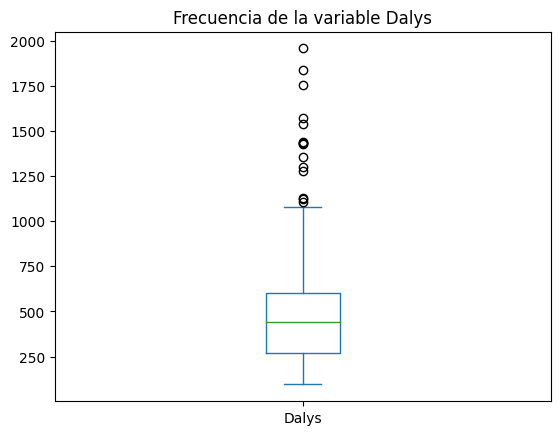

In [273]:
diabetes['Dalys'].plot(kind = 'box', title = 'Frecuencia de la variable Dalys')
plt.show()

In [274]:
iqr(diabetes, 'Dalys')

Variable: Dalys 
 --------- 
 q1: 272.0 
 q3: 600.0 
 IRQ: 328.0 
 --------- 
 Upper limit: 1092.0 
 Lower limit: -220.0


In [275]:
outliers1 = find_outliers_IQR(diabetes, 'Dalys')
outliers1.sort_values(by = 'Dalys', ascending = True)

,Country_Code,Sexo,Dalys,Deaths,Test_availability,Gross_Income
323,MUS,BTSX,1104.0,48.7,No data received,7780.0
321,MUS,FMLE,1125.0,42.9,No data received,7780.0
326,MEX,FMLE,1128.0,70.9,Yes,8930.0
265,KIR,FMLE,1278.0,83.0,Yes,2010.0
429,VCT,BTSX,1301.0,125.8,No data received,6030.0
214,GUY,FMLE,1356.0,119.8,No data received,2900.0
266,KIR,BTSX,1429.0,88.3,Yes,2010.0
515,TTO,FMLE,1432.0,122.6,Yes,15840.0
514,TTO,BTSX,1435.0,128.2,Yes,15840.0
513,TTO,MLE,1436.0,134.5,Yes,15840.0


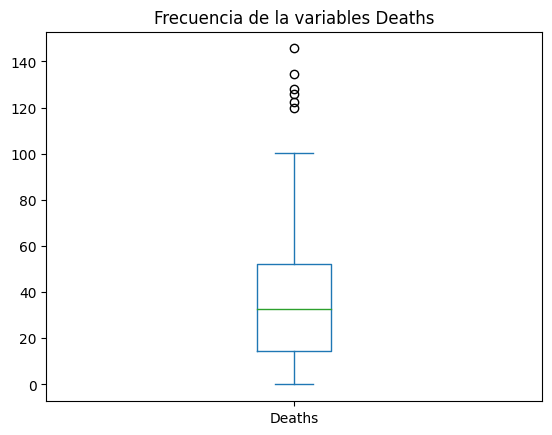

In [276]:
diabetes['Deaths'].plot(kind = 'box', title = 'Frecuencia de la variables Deaths')
plt.show()

In [277]:
iqr(diabetes, 'Deaths')

Variable: Deaths 
 --------- 
 q1: 14.7 
 q3: 52.1 
 IRQ: 37.4 
 --------- 
 Upper limit: 108.2 
 Lower limit: -41.4


In [278]:
outliers2 = find_outliers_IQR(diabetes, 'Deaths')
outliers2.sort_values(by = 'Deaths', ascending = True)

,Country_Code,Sexo,Dalys,Deaths,Test_availability,Gross_Income
214,GUY,FMLE,1356.0,119.8,No data received,2900.0
515,TTO,FMLE,1432.0,122.6,Yes,15840.0
429,VCT,BTSX,1301.0,125.8,No data received,6030.0
514,TTO,BTSX,1435.0,128.2,Yes,15840.0
513,TTO,MLE,1436.0,134.5,Yes,15840.0
431,VCT,FMLE,1539.0,145.6,No data received,6030.0


In [279]:
outliers1.Dalys.isin(outliers2.Dalys).sum() #Comparando la repetición de outliers.

6

+ Hay 6 filas que presentan outliers tanto para 'Dalys' como para 'Deaths' (mismas filas).

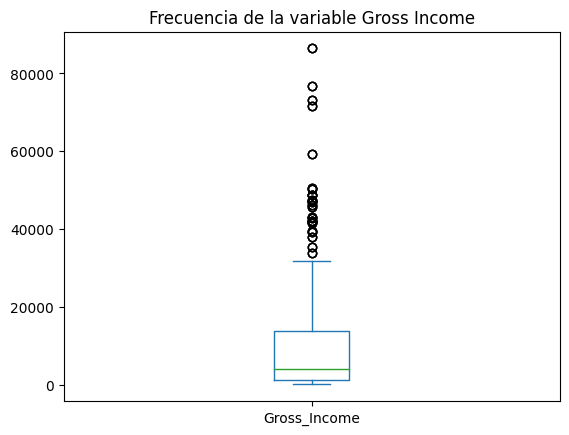

In [280]:
diabetes['Gross_Income'].plot(kind = 'box', title = 'Frecuencia de la variable Gross Income')
plt.show()

In [281]:
iqr(diabetes, 'Gross_Income')

Variable: Gross_Income 
 --------- 
 q1: 1250.0 
 q3: 13890.0 
 IRQ: 12640.0 
 --------- 
 Upper limit: 32850.0 
 Lower limit: -17710.0


In [282]:
outliers3 = find_outliers_IQR(diabetes, 'Gross_Income')
outliers3.sort_values(by = 'Gross_Income', ascending = True)

,Country_Code,Sexo,Dalys,Deaths,Test_availability,Gross_Income
225,ISL,BTSX,96.0,4.4,Yes,33890.0
227,ISL,MLE,97.0,5.2,Yes,33890.0
226,ISL,FMLE,95.0,3.9,Yes,33890.0
246,ITA,MLE,297.0,13.3,Yes,35530.0
247,ITA,BTSX,276.0,12.3,Yes,35530.0
...,...,...,...,...,...,...
294,LUX,FMLE,169.0,6.0,Yes,76820.0
295,LUX,BTSX,162.0,6.8,Yes,76820.0
374,NOR,FMLE,173.0,5.4,Yes,86390.0
372,NOR,MLE,178.0,8.7,Yes,86390.0


+ La variable Gross Income presenta 75 (23 ya que esta variable repite 3 veces los valores) outliers que van desde 33890 hasta 86390.

+ Entiendo que eliminar estos outliers no tendría sentido ya que estos valores no son erróneos, sin embargo, de forma natural, los ingresos brutos per capita de algunos países se salen de la estadística.

**El dataset 'diabetes' presenta las siguientes características:**

+ La columna Country_Code es de tipo categórica y está compuesta por 191 códigos únicos por país repetidos tres veces cada uno.

+ La columna Sexo es de tipo categórica y está compuesta de 3 etiquetas para hombres, mujeres y para ambos sexos. Cada etiqueta se repite 191 a lo largo del dataset.

+ La columna Dalys representa la sumatoria de los año de vivencia con una enfermedad (buscar OMS definición). La misma presenta valores outliers (15) que parecieran ser propios de la característica de esta variable y por lo tanto no deberían ser eliminados. El valor más extremo está representado por Naurú, un país isla localizado al norte de Australia.

+ La columna muertes representa el número de muertes por diabetes por cada 100.000 habitantes durante el año del estudio. La misma presenta valores outliers (6). El valor más extremo corresponde a mujeres del país de San Vicente y las Granadinas, en el caribe.

+ La columna Test_availability contiene información acerca de si el país en cuestión tiene el equipamiento para realizar testeos de diabetes en el nivel de salud primario. Es una variable de tipo categórica que toma los siguientes 4 valores: Yes, No data received, No, Don't know.

+ La columna Gross_Income representa el ingreso per capita en dolares de el país en el momento de el estudio. Esta variable presenta 48 valores nulos debido a que el dataset de donde contenía información acerca de menos países que los restantes datasets. Esta variable también presenta 75 valores extremos en el límite superior, el más extremo de ellos está representado por Noruega, el país con el mayor ingreso per capita del mundo.

    + Considero que debido a la presencia de outliers, la mejor forma de rellenar los valores nulos puede ser mediante el uso de la media.

In [283]:
median = diabetes['Gross_Income'].median()
median

4250.0

In [284]:
diabetes['Gross_Income'].fillna(median, inplace = True)

In [285]:
diabetes.isnull().sum()

Country_Code         0
Sexo                 0
Dalys                0
Deaths               0
Test_availability    0
Gross_Income         0
dtype: int64

## 4.4 Enriquecimiento: Creación de variables de resúmen

Naciones Unidas (UN), clasifica a los países según sus ingresos brutos per capita en:

+ Low: < $1035

+ Lower-middle: 1036 - 4085

+ Upper-middle: 4086 - 12615

+ High: > 12615

In [286]:
#Establezco las condiciones de los ingresos brutos para la nueva variable
conditions = [
    (diabetes['Gross_Income'] <= 1035),
    (diabetes['Gross_Income'] >= 1036) & (diabetes['Gross_Income'] <= 4085),
    (diabetes['Gross_Income'] >= 4086) & (diabetes['Gross_Income'] < 12615),
    (diabetes['Gross_Income'] >= 12615)
]

#Establezco los nombres de las categorías
categories = ['Low', 'Lower-middle', 'Upper-middle', 'High']

#Aplico la categorias según las condiciones usando np. También se puede hacer con Apply()
diabetes['Category'] = np.select(conditions, categories, default='Unknown')

diabetes.head()

,Country_Code,Sexo,Dalys,Deaths,Test_availability,Gross_Income,Category
0,AFG,MLE,412.0,27.5,Yes,410.0,Low
1,AFG,FMLE,371.0,30.9,Yes,410.0,Low
2,AFG,BTSX,394.0,29.3,Yes,410.0,Low
3,ALB,BTSX,177.0,8.6,Yes,3970.0,Lower-middle
4,ALB,FMLE,169.0,8.2,Yes,3970.0,Lower-middle


In [287]:
diabetes['Category'].value_counts()

Upper-middle    183
Lower-middle    150
High            141
Low              99
Name: Category, dtype: int64

+ Ninguna fila tomó el valor 'Unknown' de la función select.

___
#5 Análisis exploratorio de datos (EDA)

###5.1 Data Acquisition 2: Incorporación de datos geolocalizados

In [288]:
# Cargo nuevo datset con información geoespecial.
url = 'https://gist.githubusercontent.com/metal3d/5b925077e66194551df949de64e910f6/raw/c5f20a037409d96958553e2eb6b8251265c6fd63/country-coord.csv'
df = pd.read_csv(url, sep = ',')

In [289]:
df.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6


In [290]:
#Renombro la columna Alpha-3 para que coincida con el dataset de diabetes.
df.rename(columns = {'Alpha-3 code': 'Country_Code'}, inplace = True)

In [291]:
# Uno los datasets
df1 = pd.merge(diabetes, df, how = 'left', on = ['Country_Code'])

In [292]:
df1.head()

,Country_Code,Sexo,Dalys,Deaths,Test_availability,Gross_Income,Category,Country,Alpha-2 code,Numeric code,Latitude (average),Longitude (average)
0,AFG,MLE,412.0,27.5,Yes,410.0,Low,Afghanistan,AF,4,33.0,65.0
1,AFG,FMLE,371.0,30.9,Yes,410.0,Low,Afghanistan,AF,4,33.0,65.0
2,AFG,BTSX,394.0,29.3,Yes,410.0,Low,Afghanistan,AF,4,33.0,65.0
3,ALB,BTSX,177.0,8.6,Yes,3970.0,Lower-middle,Albania,AL,8,41.0,20.0
4,ALB,FMLE,169.0,8.2,Yes,3970.0,Lower-middle,Albania,AL,8,41.0,20.0


In [293]:
#Reemplazo los nombres de las categorías de género para hacer mas legible el código y visualizaciones.
df1['Sexo'] = df1['Sexo'].replace({'FMLE': 'Female', 'MLE': 'Male'})
df1.head()

,Country_Code,Sexo,Dalys,Deaths,Test_availability,Gross_Income,Category,Country,Alpha-2 code,Numeric code,Latitude (average),Longitude (average)
0,AFG,Male,412.0,27.5,Yes,410.0,Low,Afghanistan,AF,4,33.0,65.0
1,AFG,Female,371.0,30.9,Yes,410.0,Low,Afghanistan,AF,4,33.0,65.0
2,AFG,BTSX,394.0,29.3,Yes,410.0,Low,Afghanistan,AF,4,33.0,65.0
3,ALB,BTSX,177.0,8.6,Yes,3970.0,Lower-middle,Albania,AL,8,41.0,20.0
4,ALB,Female,169.0,8.2,Yes,3970.0,Lower-middle,Albania,AL,8,41.0,20.0


## 5.2 Análisis gráfico univariado

**¿Cuál es el número de países por categoría de Naciones Unidas?**

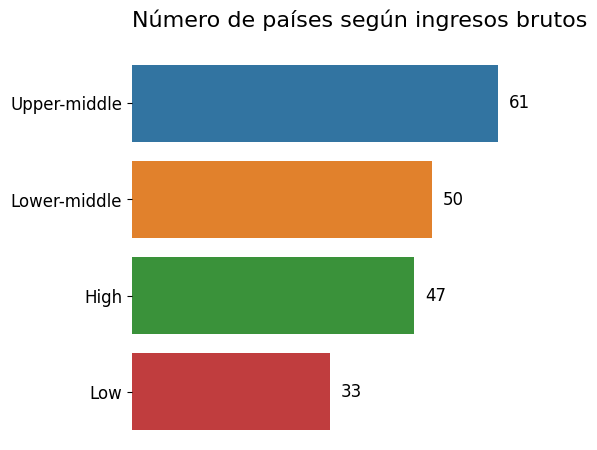

In [294]:
df = df1.loc[df1['Sexo'] == 'Male', ['Gross_Income', 'Category']].groupby('Category').agg('count').sort_values('Gross_Income', ascending = False).reset_index()

f, ax = plt.subplots(figsize = (6, 5))

data = df

sns.set_color_codes('pastel')
sns.barplot(data = data, x = 'Gross_Income', y = 'Category')

ax.set_title('Número de países según ingresos brutos', fontdict = {'size': 16}, loc = 'left', pad = 20)

ax.set(xlim=(0, 70), ylabel=None,
       xlabel=None, xticklabels = [])

ax.bar_label(ax.containers[0], fmt='%1.f', padding = 8, fontsize = 12)

sns.despine(left=True, bottom=True)

ax.set_xticks([])

plt.subplots_adjust(left=0.2)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.savefig('graph1.png', dpi=300, bbox_inches='tight')

plt.show()

+ Según el número de países por categoría éstas se ordenan de modo decreciente en: 'Upper-middle', 'Lower-middle', 'High' y 'Low'.

+ La categorías que indican ingresos brutos medios presentan mayor cantidad de países, mientras que las categorías mas extremas ('High', 'Low') presentan una mayor cantidad de países.

+ La categoría de ingresos brutos bajos ('Low') presenta la menor cantidad de países (33),  mientras que la categoria de ingresos brutos medios-altos ('Upper-middle') presenta una mayor cantidad de países (61).

+ Conclusion: Según los valores de ingresos brutos obtenidos, la gran mayoría de los países se encuentran en las áreas de ingresos medios, mientras que las clasificaciones más extremas son menos predominantes

**Según la disponibilidad de testeo de diabetes en la atención primaria de la salud, ¿Cuál es el número de países que presentan esta disponibilidad?**

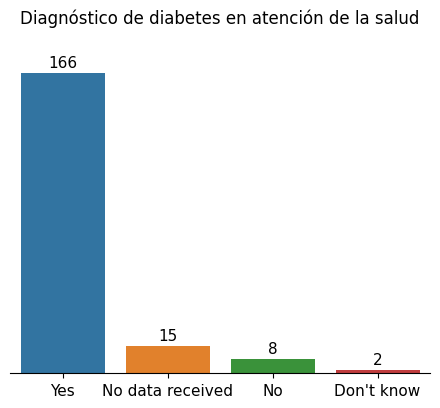

In [295]:
df = df1.loc[df1['Sexo'] == 'Male', ['Test_availability', 'Gross_Income']].groupby('Test_availability').agg('count').sort_values('Gross_Income', ascending = False).reset_index()

f, ax = plt.subplots(figsize = (6, 4))

data = df

sns.set_color_codes('pastel')
sns.barplot(data = data, x = 'Test_availability', y = 'Gross_Income')

ax.set_title('Diagnóstico de diabetes en atención de la salud', fontdict = {'size': 12}, pad = 30)

ax.set(ylim=(0, 170), ylabel=None,
       xlabel=None, yticklabels = [])

ax.bar_label(ax.containers[0], fmt='%1.f', padding = 2, fontsize = 11)

sns.despine(left=True)

ax.set_yticks([])

plt.subplots_adjust(left=0.2)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)

plt.savefig('graph2.png', dpi=300, bbox_inches='tight')

plt.show()

**¿Cuál es la cantidad total de ingresos brutos per capita según las categorías establecidas por UN?**

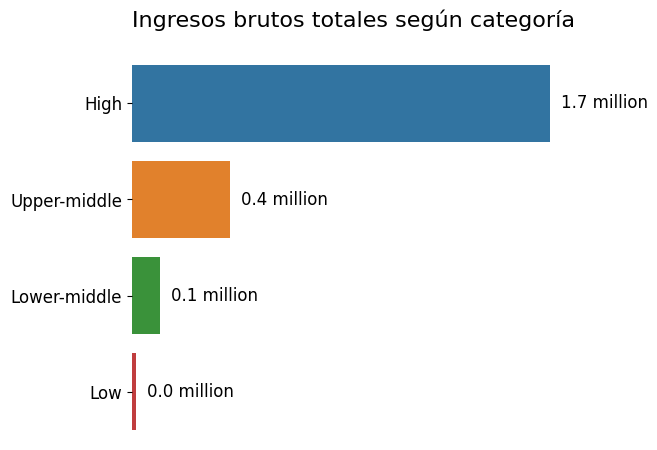

In [296]:
df = df1.loc[df1['Sexo'] == 'BTSX', ['Gross_Income', 'Category']].groupby('Category').agg(sum).sort_values(by = 'Gross_Income', ascending = False).reset_index()

f, ax = plt.subplots(figsize = (6, 5))

data = df

sns.set_color_codes('pastel')
sns.barplot(data = data, x = 'Gross_Income', y = 'Category')

ax.set_title('Ingresos brutos totales según categoría', fontdict = {'size': 16}, loc = 'left', pad = 20)

ax.set(xlim=(0, 1700000), ylabel=None,
       xlabel=None, xticklabels = [])

def format_label(x):
    return '{:.1f} million'.format(x / 1000000)

ax.bar_label(ax.containers[0], fmt=format_label, padding = 8, fontsize = 12)

sns.despine(left=True, bottom=True)

ax.set_xticks([])

plt.subplots_adjust(left=0.2)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.savefig('graph3.png', dpi=300, bbox_inches='tight')

plt.show()

+ La categoría de ingresos brutos altos, a pesar de ser la tercera en número total de países, presenta la mayor sumatoría de ingresos brutos, en relación a las otras tres categorias.

+ La categoría de ingresos brutos bajos está por debajo del 0.0 millón de dólares.

+ La sumatoría de las categorías 'Upper-middle' y 'Lower-middle' representan juntas menos de un tercio de la categoría 'High'.

+ Conclusión: La sumatoria de ingresos brutos totales para los países de categoría 'High' es por mucho mayor a las categorías restantes.

**Según sexo, ¿Cuál es el número total de muertes a nivel mundial a causa de la enfermedad de diabetes?**

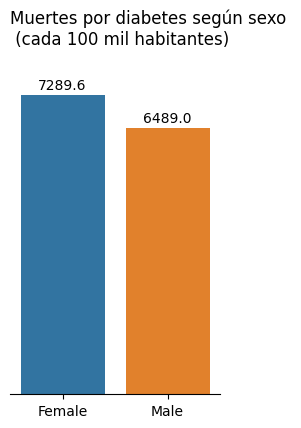

In [297]:
df = df1.loc[df1['Sexo'].isin(['Female', 'Male']), ['Sexo', 'Deaths']].groupby('Sexo').agg('sum').reset_index()

f, ax = plt.subplots(figsize = (3, 4))

data = df

sns.set_color_codes('pastel')
sns.barplot(data = data, x = 'Sexo', y = 'Deaths')

ax.set_title('Muertes por diabetes según sexo \n (cada 100 mil habitantes)', fontdict = {'size': 12}, pad = 30, loc = 'left')

ax.set(ylim=(0, 7500), ylabel=None,
       xlabel=None, yticklabels = [])

ax.bar_label(ax.containers[0], fmt='%.1f', padding = 2)

sns.despine(left=True)

ax.set_yticks([])

plt.subplots_adjust(left=0.2)

plt.savefig('graph4.png', dpi=300, bbox_inches='tight')

plt.show()

+ El número de mujeres fallecidas por diabetes (cada 100 mil habitantes) a nivel mundial es mayor que el número de hombres fallecidos.

+ Conclusión: se registró un mayor número de mujeres fallecidas por cada 100 mil habitantes en relación al número de hombres (∼800 más).

**¿Que sexo presenta el mayor número de DALYS?**

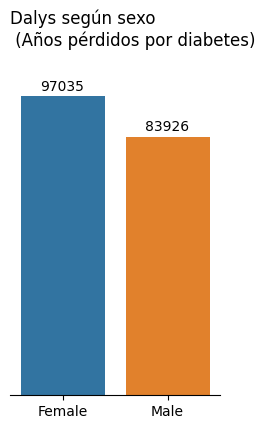

In [298]:
df = df1.loc[df1['Sexo'].isin(['Female', 'Male']), ['Sexo', 'Dalys']].groupby('Sexo').agg('sum').reset_index()

f, ax = plt.subplots(figsize = (3, 4))

data = df

sns.set_color_codes('pastel')
sns.barplot(data = data, x = 'Sexo', y = 'Dalys')

ax.set_title('Dalys según sexo \n (Años pérdidos por diabetes)', fontdict = {'size': 12}, pad = 30, loc = 'left')

ax.set(ylim=(0, 100000), ylabel=None,
       xlabel=None, yticklabels = [])

ax.bar_label(ax.containers[0], fmt='%1.f', padding = 2)

sns.despine(left=True)

ax.set_yticks([])

plt.subplots_adjust(left=0.2)

plt.savefig('graph5.png', dpi=300, bbox_inches='tight')

plt.show()

+ Las mujeres presentan un mayor número de años pérdidos por diabetes, esto era esperable ya que las mujeres también presentan el mayor número de muertes a causa de la enfermedad.

+ Conclusión: La mujeres presentan un mayor número de años pérdidos a causa de la enfermedad de diabetes.

**¿A qué categoría de ingresos brutos pertencen los países que no presentan diagnóstico de diabetes en la atención primaria de la salud?**


In [299]:
df = df1.loc[df1['Sexo'] == 'Male']
df.loc[df['Test_availability'] == 'No', ['Test_availability', 'Country', 'Category']].groupby('Category').agg('count')

,Test_availability,Country
Category,,
Low,6,6
Lower-middle,2,2


+ El 75% (6/8) corresponde a países de bajos ingresos brutos

+ El 25% (2/8) restante corresponde a países de ingresos brutos medios.

## 5.3 Análisis gráfico bivariado

In [300]:
df = df1.loc[df1['Sexo'].isin(['Female', 'Male']), ['Sexo', 'Deaths','Dalys', 'Category']].groupby(['Sexo', 'Category']).agg(['sum', 'mean', 'median']).round(2).reset_index()
df


Sexo      Category  Deaths                  Dalys               
                            sum   mean median      sum    mean median
0  Female          High  1048.1  22.30  11.40  18179.0  386.79  239.0
1  Female           Low  1799.2  54.52  59.10  18170.0  550.61  576.0
2  Female  Lower-middle  2153.9  43.08  40.90  26916.0  538.32  543.0
3  Female  Upper-middle  2288.4  37.51  31.50  33770.0  553.61  487.0
4    Male          High  1183.8  25.19  14.50  17733.0  377.30  272.0
5    Male           Low  1395.0  42.27  44.30  14070.0  426.36  425.0
6    Male  Lower-middle  1866.2  37.32  39.35  23555.0  471.10  430.5
7    Male  Upper-middle  2044.0  33.51  28.50  28568.0  468.33  372.0

+ Se observa que hay una gran diferenca entre la media y la mediana para Deaths y Dalys según sexo y categoría de ingresos brutos. Esto podría indicar que la media está siendo arrastrada por la presencia de outliers, y no sería un buen indicador de las distribución de los datos.

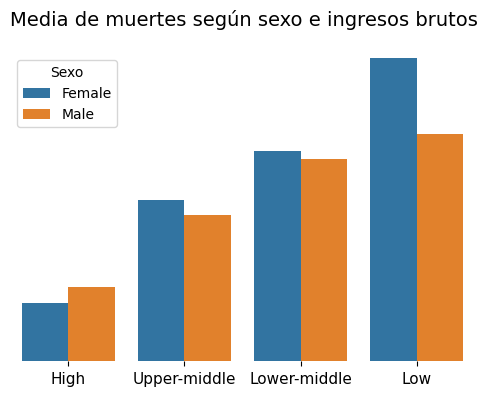

In [301]:
df = df1.loc[df1['Sexo'].isin(['Female', 'Male']), ['Sexo', 'Deaths', 'Category']].groupby(['Sexo', 'Category']).agg('median').sort_values(by = 'Deaths', ascending = True) .reset_index()

f, ax = plt.subplots(figsize = (6, 4))

data = df

sns.set_color_codes('pastel')

sns.barplot(data = data, x = 'Category', y = 'Deaths', hue = 'Sexo')

ax.set_title('Media de muertes según sexo e ingresos brutos', fontdict = {'size': 14}, loc = 'left', pad = 20)

ax.set(ylim=(0, 60), ylabel=None,
       xlabel=None)

sns.despine(left=True, bottom=True)

ax.set_yticks([])


ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)

plt.savefig('graph6.png', dpi=300, bbox_inches='tight')

plt.show()

+ Se observa que la media de muertes tanto en hombres como es mujeres es mayor en la categoría 'Low', en comparación al resto de las categorías.

+ La diferencia en la media de muertes para la categoría 'Low' es mayor en mujeres que en hombres, mientras que en el resto de la categorías la diferencia entre sexos es menos marcada.

+ Se observa como el número medio de muertes tanto para hombres como mujeres aumenta a medida decrece la categoría de ingresos brutos.

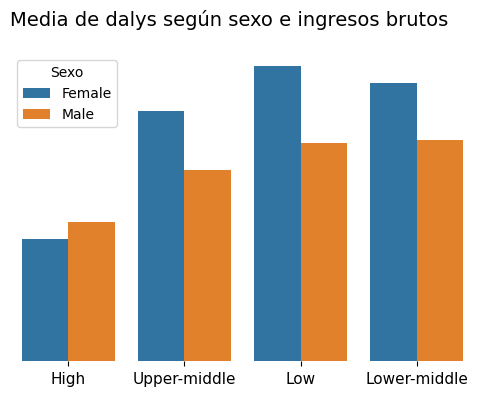

In [302]:
df = df1.loc[df1['Sexo'].isin(['Female', 'Male']), ['Sexo', 'Dalys', 'Category']].groupby(['Sexo', 'Category']).agg('median').sort_values(by = ['Dalys'], ascending = True).reset_index()

f, ax = plt.subplots(figsize = (6, 4))

data = df

sns.set_color_codes('pastel')

sns.barplot(data = data, x = 'Category', y = 'Dalys', hue = 'Sexo')

ax.set_title('Media de dalys según sexo e ingresos brutos', fontdict = {'size': 14}, loc = 'left', pad = 20)

ax.set(ylim=(0, 600), ylabel=None,
       xlabel=None)

sns.despine(left=True, bottom=True)

ax.set_yticks([])


ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)

plt.savefig('graph7.png', dpi=300, bbox_inches='tight')

plt.show()

+ El número de años pérdidos en mujeres aumenta según empeoran las condiciones económicas.

+ De manera similar ocurre en hombres aunque las diferencias entre las categorías 'Low' y 'Lower-middle' son pequeñas.

+ A exceptión de las categoría 'High' la cual presenta un mayor número de dalys en hombres, el resto de las categorías presenta una marcada diferencias en detrimento de las mujeres.

**¿Qué países componen el top 10 de mayores/menores ingresos brutos?**

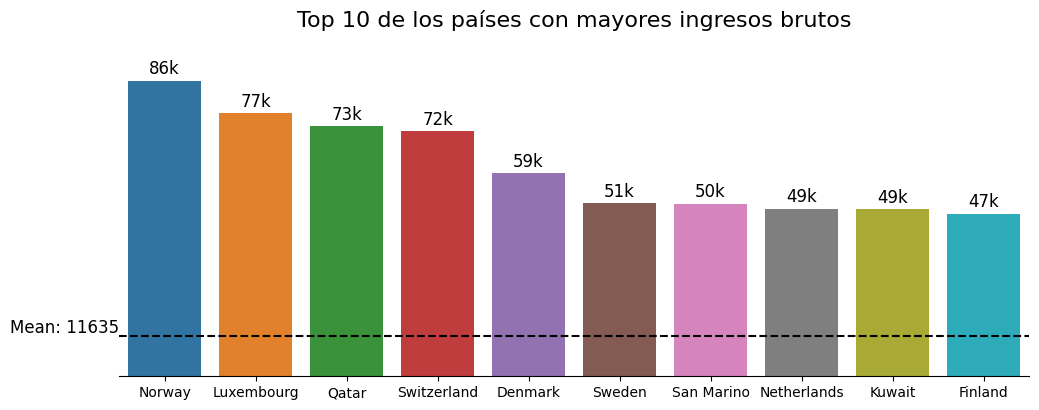

In [303]:
mean_value = df1.loc[df1['Sexo'] == 'Female', ['Gross_Income']].mean()[0].round()

df = df1.loc[df1['Sexo'] == 'Female', ['Country', 'Gross_Income']].sort_values(by = 'Gross_Income', ascending = False)[0:10][:]

f, ax = plt.subplots(figsize = (13, 4))

data = df

sns.set_color_codes('pastel')
sns.barplot(data = data, x = 'Country', y = 'Gross_Income')

plt.axhline(mean_value, color='black', linestyle = '--',label='Mean')

plt.text(-0.5, mean_value, f'Mean: {mean_value:.0f}', ha='right', va='bottom', fontsize = 12)

ax.set_title('Top 10 de los países con mayores ingresos brutos', fontdict = {'size': 16}, pad = 30)

ax.set(ylim=(0, 90000), ylabel=None,
       xlabel=None, yticklabels = [])

def format_label(x):
    if x >= 1000:
        value = '{:.0f}k'.format(x / 1000)
    else:
        value = '{:.0f}'.format(x)
    return value

ax.bar_label(ax.containers[0], fmt=format_label, padding=2, fontsize = 12)
sns.despine(left=True)

ax.set_yticks([])

plt.subplots_adjust(left=0.2) #Al no haber eje x, ayuda a que al descargar el gráfico no se corte.

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

plt.savefig('graph8.png', dpi=300, bbox_inches='tight')

plt.show()

**¿Cuál es la relación entre los ingresos brutos y las consecuencias de la enfermedad de diabetes?**

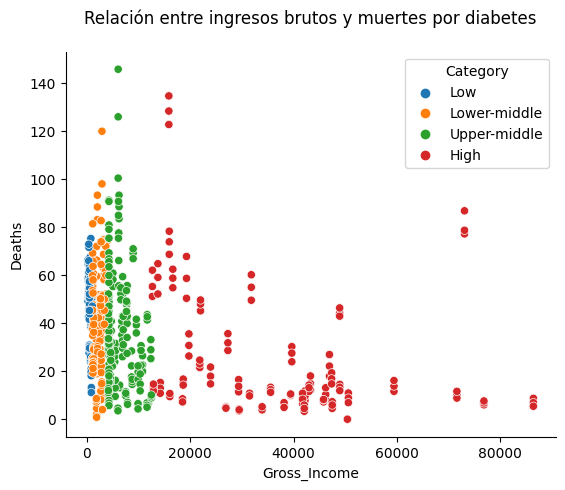

In [304]:
f, ax = plt.subplots(figsize = (7, 5))

sns.set_color_codes('pastel')
sns.scatterplot(data = df1, x = 'Gross_Income', y = 'Deaths', hue = 'Category')

title = 'Relación entre ingresos brutos y muertes por diabetes'
plt.title(title, fontsize=12, pad=20)

sns.despine(top=True)

plt.subplots_adjust(left=0.2)

plt.savefig('graph9.png', dpi=300, bbox_inches='tight')

plt.show()

## 5.4 Análisis de correlación lineal

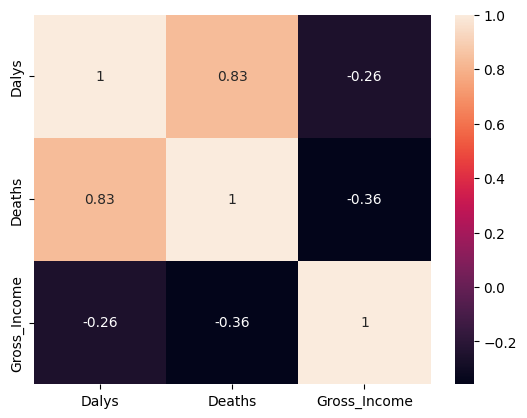

In [305]:
features = ['Dalys', 'Deaths', 'Gross_Income']
corr = diabetes[features].corr()
sns.heatmap(data = corr, annot = True)

plt.show()

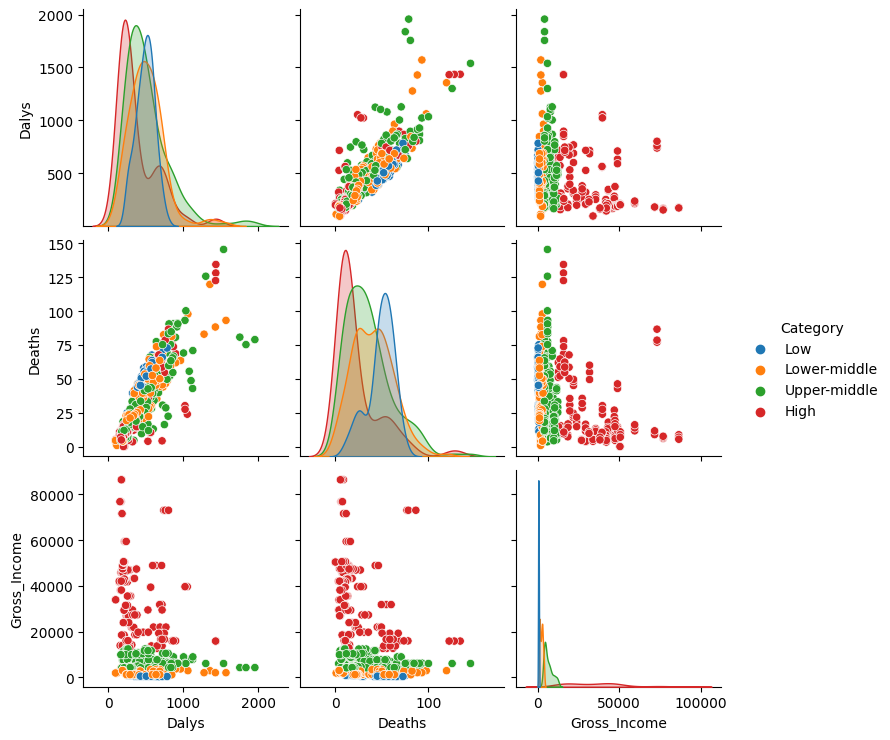

In [306]:
sns.pairplot(data=diabetes, diag_kind = 'kde', hue = 'Category');

+ Deaths y Dalys tienen una correlación relativamente fuerte (0.83)

+ Gross Income con la variable Dalys (-0.27) y Deaths (-0.37) tiene una correlación debil pero negativa. Esto tiene lógica, ya que mientras mayor es el ingreso bruto per capita del país ("mejores condiciones económicas para la población"), menores son las muertes por diabetes y los años sufriendo la enfermedad.

+ En los kdes y scatterplots se puede observar claramente como los datos se dividen según las categorías.